# Experiment 2.6
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.9'

In [2]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [3]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.9_metrics.csv", index_col=0)

In [4]:
hpo_table.sum(axis=0)

learning_rate        0.198000
batch_size        3840.000000
e_layers           840.000000
d_layers           120.000000
d_model          23808.000000
seq_len          25920.000000
MSE                 11.375842
MAE                 26.468412
Epochs            1303.000000
Time[min]          925.000000
Params[Mio.]       366.800000
Max_mem[MB]      24172.760000
dtype: float64

In [5]:
hpo_table.groupby("Params[Mio.]").mean()

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
Params[Mio.]                                                                    
0.03                0.00165        32.0       3.0       1.0     32.0     96.0   
0.04                0.00165        32.0       3.0       1.0     32.0    336.0   
0.05                0.00165        32.0       6.0       1.0     32.0     96.0   
0.06                0.00165        32.0       6.0       1.0     32.0    336.0   
0.09                0.00165        32.0      12.0       1.0     32.0     96.0   
0.10                0.00165        32.0       7.5       1.0     48.0    216.0   
0.12                0.00165        32.0       3.0       1.0     64.0    336.0   
0.18                0.00165        32.0       6.0       1.0     64.0     96.0   
0.19                0.00165        32.0       6.0       1.0     64.0    336.0   
0.33                0.00165        32.0      12.0       1.0     64.0     96.0   
0.35                0.00165        32.0       7.5       1.0     96.0    216.0   
0.39                0.00165        32.0       3.0       1.0    128.0    336.0   
0.65                0.00165        32.0       6.0       1.0    128.0     96.0   
0.68                0.00165        32.0       6.0       1.0    128.0    336.0   
1.25                0.00165        32.0      12.0       1.0    128.0     96.0   
1.28                0.00165        32.0      12.0       1.0    128.0    336.0   
1.30                0.00165        32.0       3.0       1.0    256.0     96.0   
1.36                0.00165        32.0       3.0       1.0    256.0    336.0   
2.49                0.00165        32.0       6.0       1.0    256.0     96.0   
2.55                0.00165        32.0       6.0       1.0    256.0    336.0   
4.86                0.00165        32.0      12.0       1.0    256.0     96.0   
4.92                0.00165        32.0      12.0       1.0    256.0    336.0   
4.96                0.00165        32.0       3.0       1.0    512.0     96.0   
5.08                0.00165        32.0       3.0       1.0    512.0    336.0   
9.69                0.00165        32.0       6.0       1.0    512.0     96.0   
9.81                0.00165        32.0       6.0       1.0    512.0    336.0   
19.16               0.00165        32.0      12.0       1.0    512.0     96.0   
19.28               0.00165        32.0      12.0       1.0    512.0    336.0   

                   MSE       MAE  Epochs  Time[min]  Max_mem[MB]  
Params[Mio.]                                                      
0.03          0.124463  0.252084   14.00       6.75      147.220  
0.04          0.105723  0.234630   12.50       6.25      148.040  
0.05          0.115188  0.243773   19.00      12.50      149.080  
0.06          0.104997  0.234991   15.25      10.50      149.910  
0.09          0.109812  0.239071   16.50      17.00      152.810  
0.10          0.103609  0.230254   14.50      11.00      151.695  
0.12          0.091448  0.218475   11.00       5.25      150.670  
0.18          0.105750  0.231614   23.25      15.75      153.850  
0.19          0.083713  0.209897   13.00       9.25      154.750  
0.33          0.106451  0.235263   12.25      12.75      162.010  
0.35          0.095888  0.222475   11.00       8.25      159.185  
0.39          0.082526  0.206662   10.50       5.25      156.530  
0.65          0.091455  0.216872   13.00       8.75      164.580  
0.68          0.081521  0.207316    8.25       5.75      165.660  
1.25          0.090931  0.216494    8.50       8.75      182.850  
1.28          0.082152  0.208366    8.00       8.50      183.930  
1.30          0.090598  0.213150   13.00       6.25      171.930  
1.36          0.077695  0.200126    8.25       3.75      173.360  
2.49          0.084269  0.207205   10.50       6.75      196.270  
2.55          0.078061  0.202246    9.50       6.25      197.700  
4.86          0.096290  0.222027    7.25       7.50      244.950  
4.92          0.086138  0.211109    5.50  

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

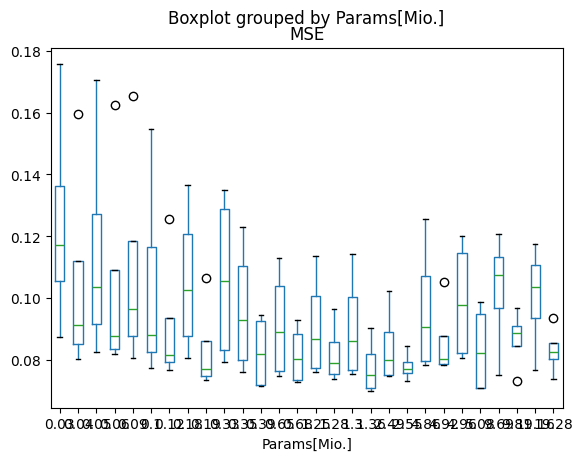

In [6]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

In [7]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

learning_rate  batch_size  d_layers     d_model     seq_len  \
e_layers                                                                
3              0.000655        32.0       1.0  250.181818  270.545455   
6              0.000914        32.0       1.0  214.857143  250.285714   
12             0.000942        32.0       1.0  205.333333  236.000000   

               MSE       MAE     Epochs  Time[min]  Params[Mio.]  Max_mem[MB]  
e_layers                                                                       
3         0.073800  0.195243  11.181818   5.272727      1.644545   176.150909  
6         0.075209  0.198155  12.000000   8.285714      2.525714   193.770714  
12        0.076894  0.200617   8.666667   9.083333      4.915000   238.663333

In [8]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
67          0.0010          32         3         1      256      336   
9           0.0001          32         3         1      512      336   
39          0.0005          32         3         1      512      336   
37          0.0005          32         3         1      256      336   
65          0.0010          32         3         1      128      336   
35          0.0005          32         3         1      128      336   
75          0.0010          32         6         1      128      336   
47          0.0005          32         6         1      256      336   
19          0.0001          32         6         1      512      336   
45          0.0005          32         6         1      128      336   
103         0.0050          32         6         1       64      336   
29          0.0001          32        12         1      512      336   
55          0.0005          32        12         1      128      336   
46          0.0005          32         6         1      256       96   
74          0.0010          32         6         1      128       96   
73          0.0010          32         6         1       64      336   
18          0.0001          32         6         1      512       96   
76          0.0010          32         6         1      256       96   
66          0.0010          32         3         1      256       96   
85          0.0010          32        12         1      128      336   
83          0.0010          32        12         1       64      336   
54          0.0005          32        12         1      128       96   
64          0.0010          32         3         1      128       96   
28          0.0001          32        12         1      512       96   
77          0.0010          32         6         1      256      336   
44          0.0005          32         6         1      128       96   
63          0.0010          32         3         1       64      336   
36          0.0005          32         3         1      256       96   
111         0.0050          32        12         1       32      336   
17          0.0001          32         6         1      256      336   
84          0.0010          32        12         1      128       96   
57          0.0005          32        12         1      256      336   
56          0.0005          32        12         1      256       96   
27          0.0001          32        12         1      256      336   
7           0.0001          32         3         1      256      336   
43          0.0005          32         6         1       64      336   
82          0.0010          32        12         1       64       96   
26          0.0001          32        12         1      256       96   
93          0.0050          32         3         1       64      336   
91          0.0050          32         3         1       32      336   
38          0.0005          32         3         1      512       96   
72          0.0010          32         6         1       64       96   
110         0.0050          32        12         1       32       96   
53          0.0005          32        12         1       64      336   
34          0.0005          32         3         1      128       96   
117         0.0050          32        12         1      256      336   
101         0.0050          32         6         1       32      336   
81          0.0010          32        12         1       32      336   
119         0.0050          32        12         1      512      336   
25          0.0001          32        12         1      128      336   

          MSE       MAE  Epochs  Time[min]  Params[Mio.]  Max_mem[MB]  
67   0.069893  0.191371      11          5          1.36       173.36  
9    0.070867  0.192527      11          5          5.08       227.27  
39   0.071028  0.192016       7          3          5.08       227.27  
37   0.071418  0.192739       9          4  

In [9]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0698931962251663

## Learning rate vs MSE

In [10]:
list(hpo_table["Params[Mio.]"].value_counts().sort_index().index)

[0.03,
 0.04,
 0.05,
 0.06,
 0.09,
 0.1,
 0.12,
 0.18,
 0.19,
 0.33,
 0.35,
 0.39,
 0.65,
 0.68,
 1.25,
 1.28,
 1.3,
 1.36,
 2.49,
 2.55,
 4.86,
 4.92,
 4.96,
 5.08,
 9.69,
 9.81,
 19.16,
 19.28]

## Params[Mio.] vs MSE

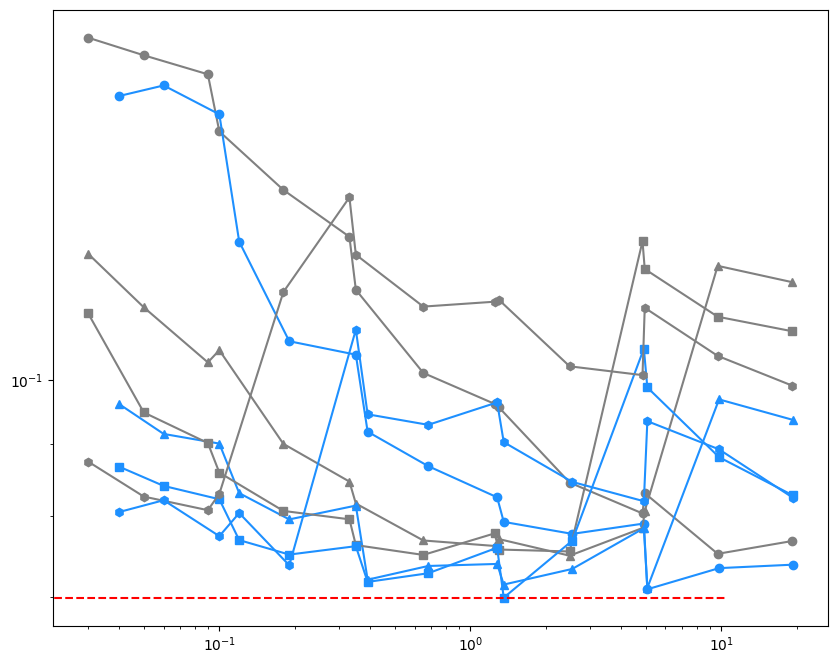

In [11]:
colors = {96: "grey", 336: "dodgerblue", 128: "darkblue"}
markers = {0.0001: 'o', 0.0005: '^', 0.001: 's', 0.005: 'h'}
seq_lens = [96, 336]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001, 0.005]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for sl in seq_lens:
        hpo_table_subset = hpo_table[(hpo_table["seq_len"] == sl) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[sl], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)
ax.set_xscale("log")
#ax.set_yscale("log")



In [12]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
90          0.0050          32         3         1       32       96   
60          0.0010          32         3         1       32       96   
30          0.0005          32         3         1       32       96   
0           0.0001          32         3         1       32       96   
91          0.0050          32         3         1       32      336   
..             ...         ...       ...       ...      ...      ...   
58          0.0005          32        12         1      512       96   
29          0.0001          32        12         1      512      336   
119         0.0050          32        12         1      512      336   
89          0.0010          32        12         1      512      336   
59          0.0005          32        12         1      512      336   

          MSE       MAE  Epochs  Time[min]  Params[Mio.]  Max_mem[MB]  
90   0.087443  0.211696      12          6          0.03       147.22  
60   0.111606  0.236798      12          6          0.03       147.22  
30   0.123108  0.250623      16          7          0.03       147.22  
0    0.175695  0.309218      16          8          0.03       147.22  
91   0.080486  0.202959      12          6          0.04       148.04  
..        ...       ...     ...        ...           ...          ...  
58   0.117490  0.242605       4          4         19.16       455.43  
29   0.073795  0.196911       6          6         19.28       458.68  
119  0.082412  0.208420       4          4         19.28       458.68  
89   0.082724  0.207255       4          4         19.28       458.68  
59   0.093665  0.220054       4          4         19.28       458.68  

[120 rows x 12 columns]

In [13]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [14]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    
    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins
    dys = [dy if dy != 0 else 1 for dy in dys]

    print(dys)

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    zs[:, -3][zs[:, -3] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=18)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-1].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=18)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="8%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


[0.00539, 528.0, 9.899999999999999, 21.175, 264.0, 0.11638162583112711]


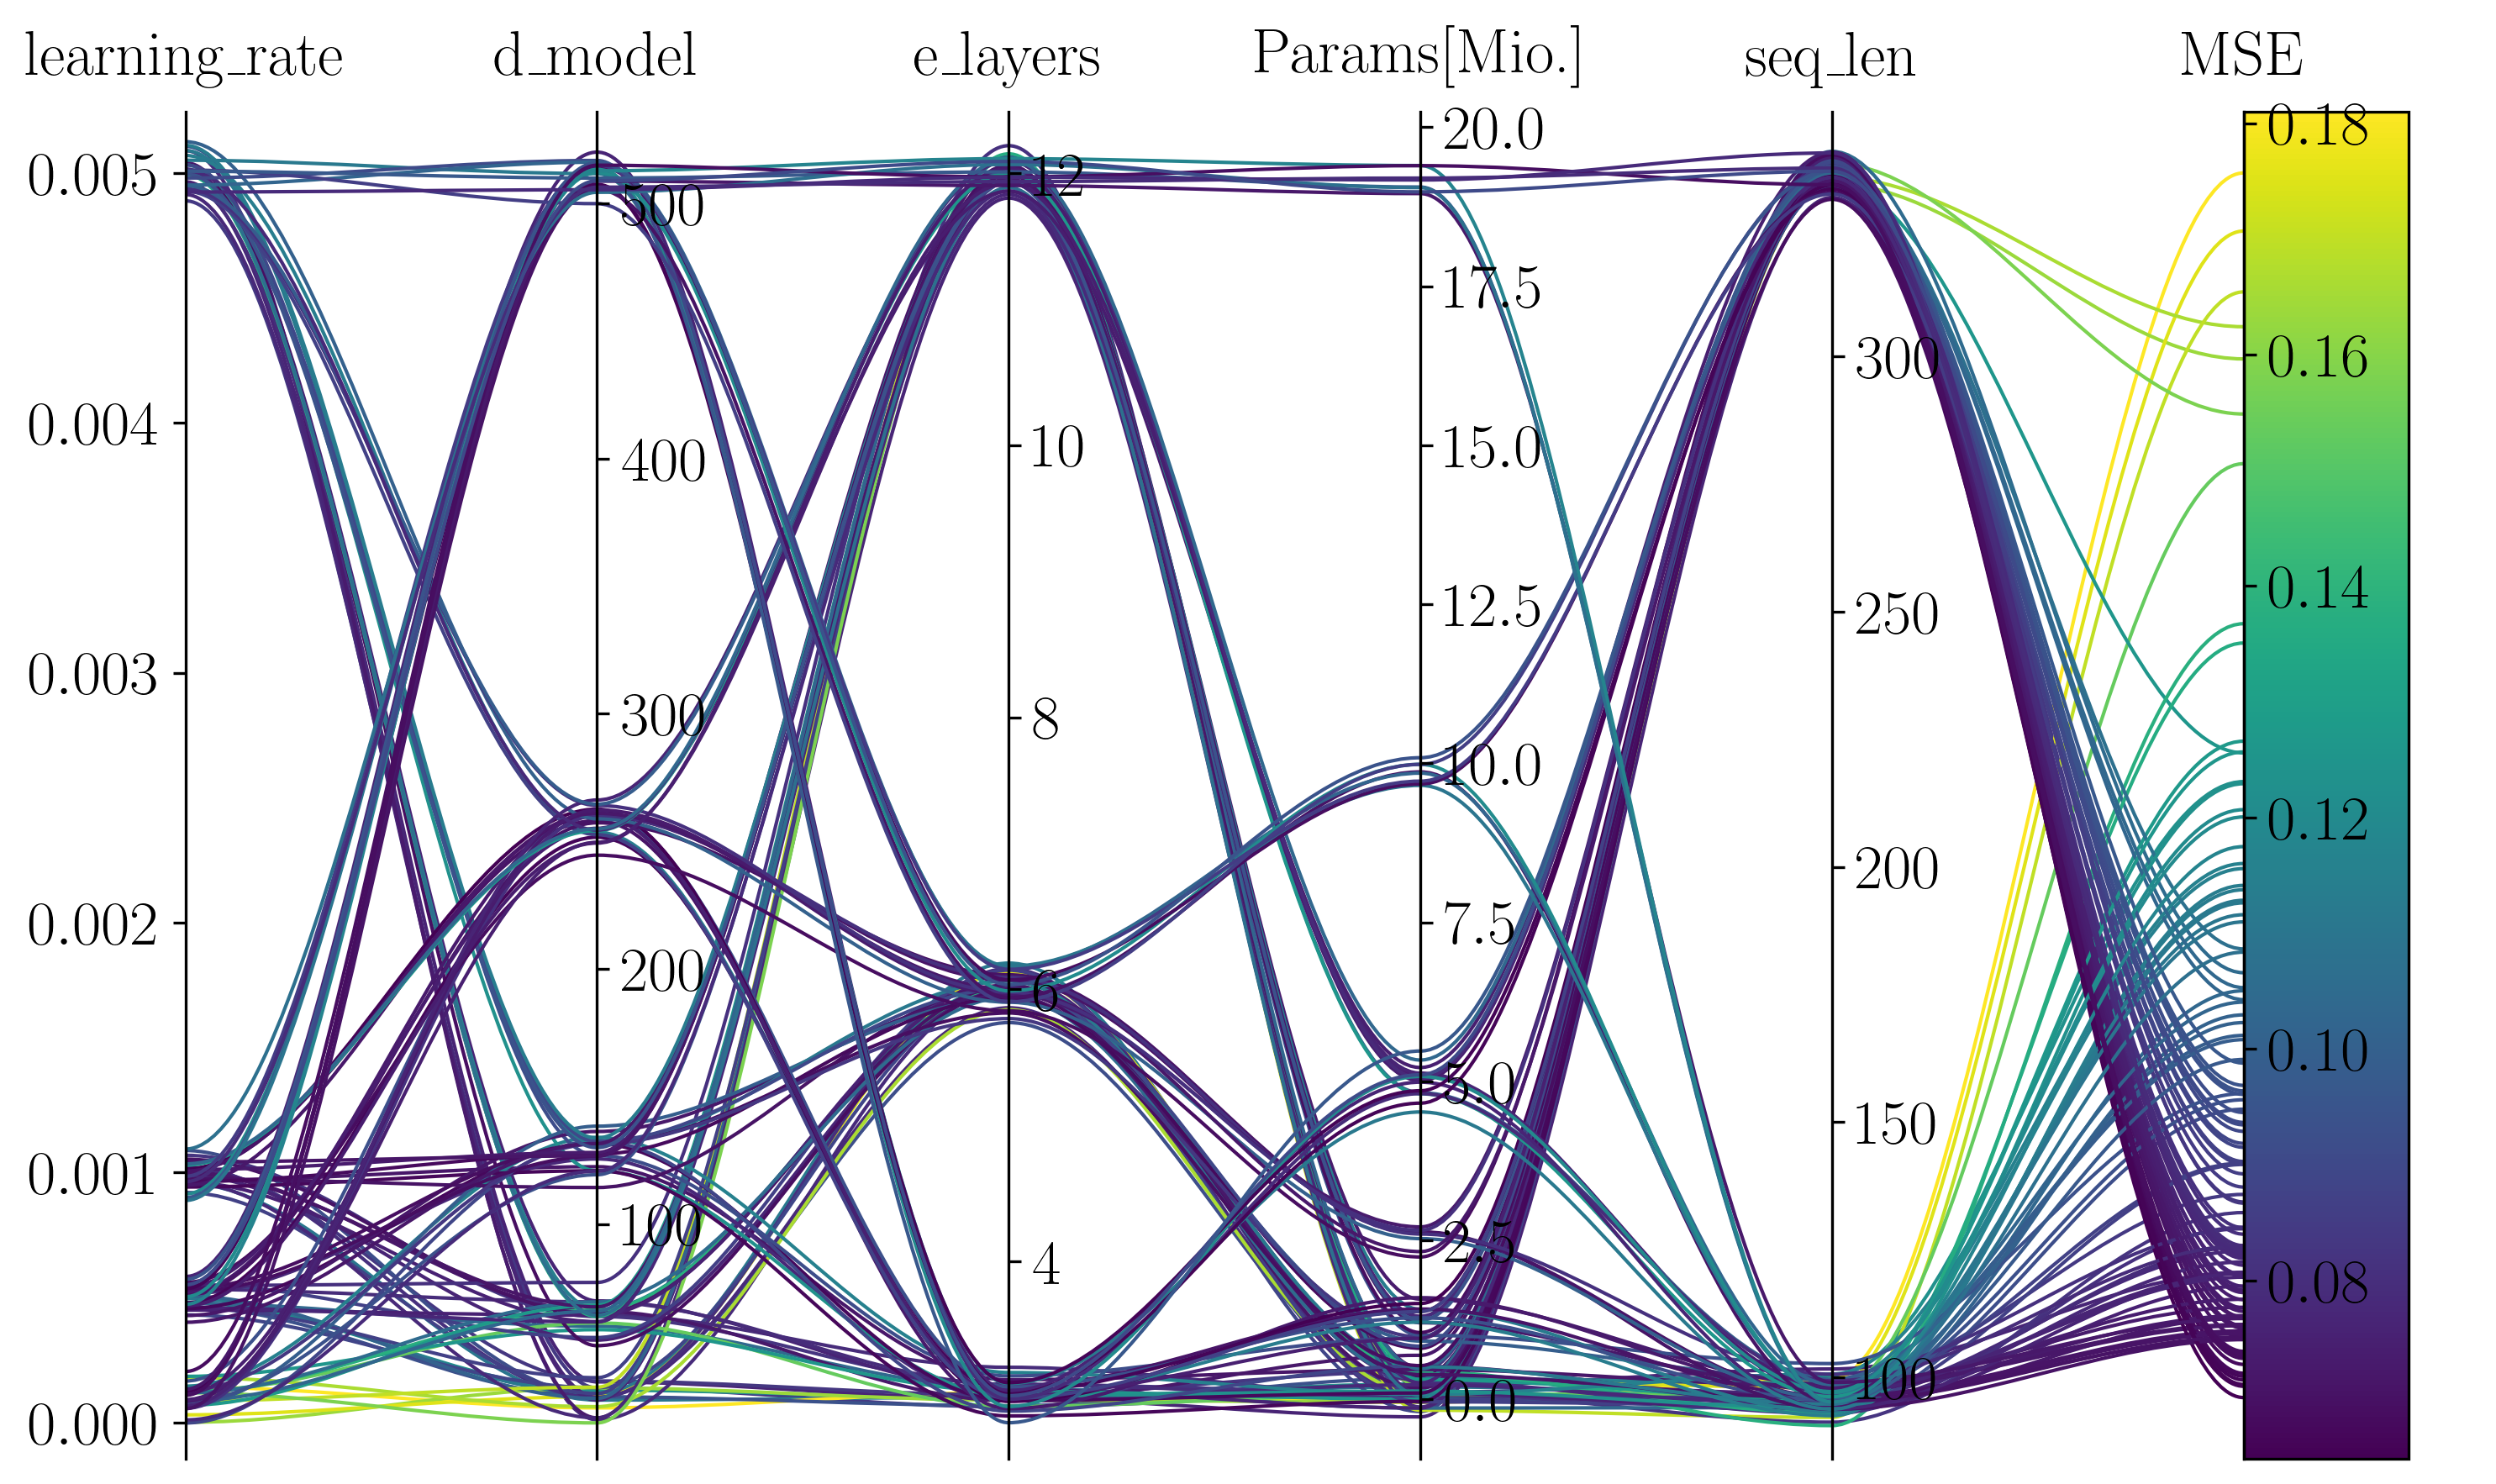

In [18]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

[0.00539, 528.0, 9.899999999999999, 21.098000000000003, 264.0, 0.010585724562406501]


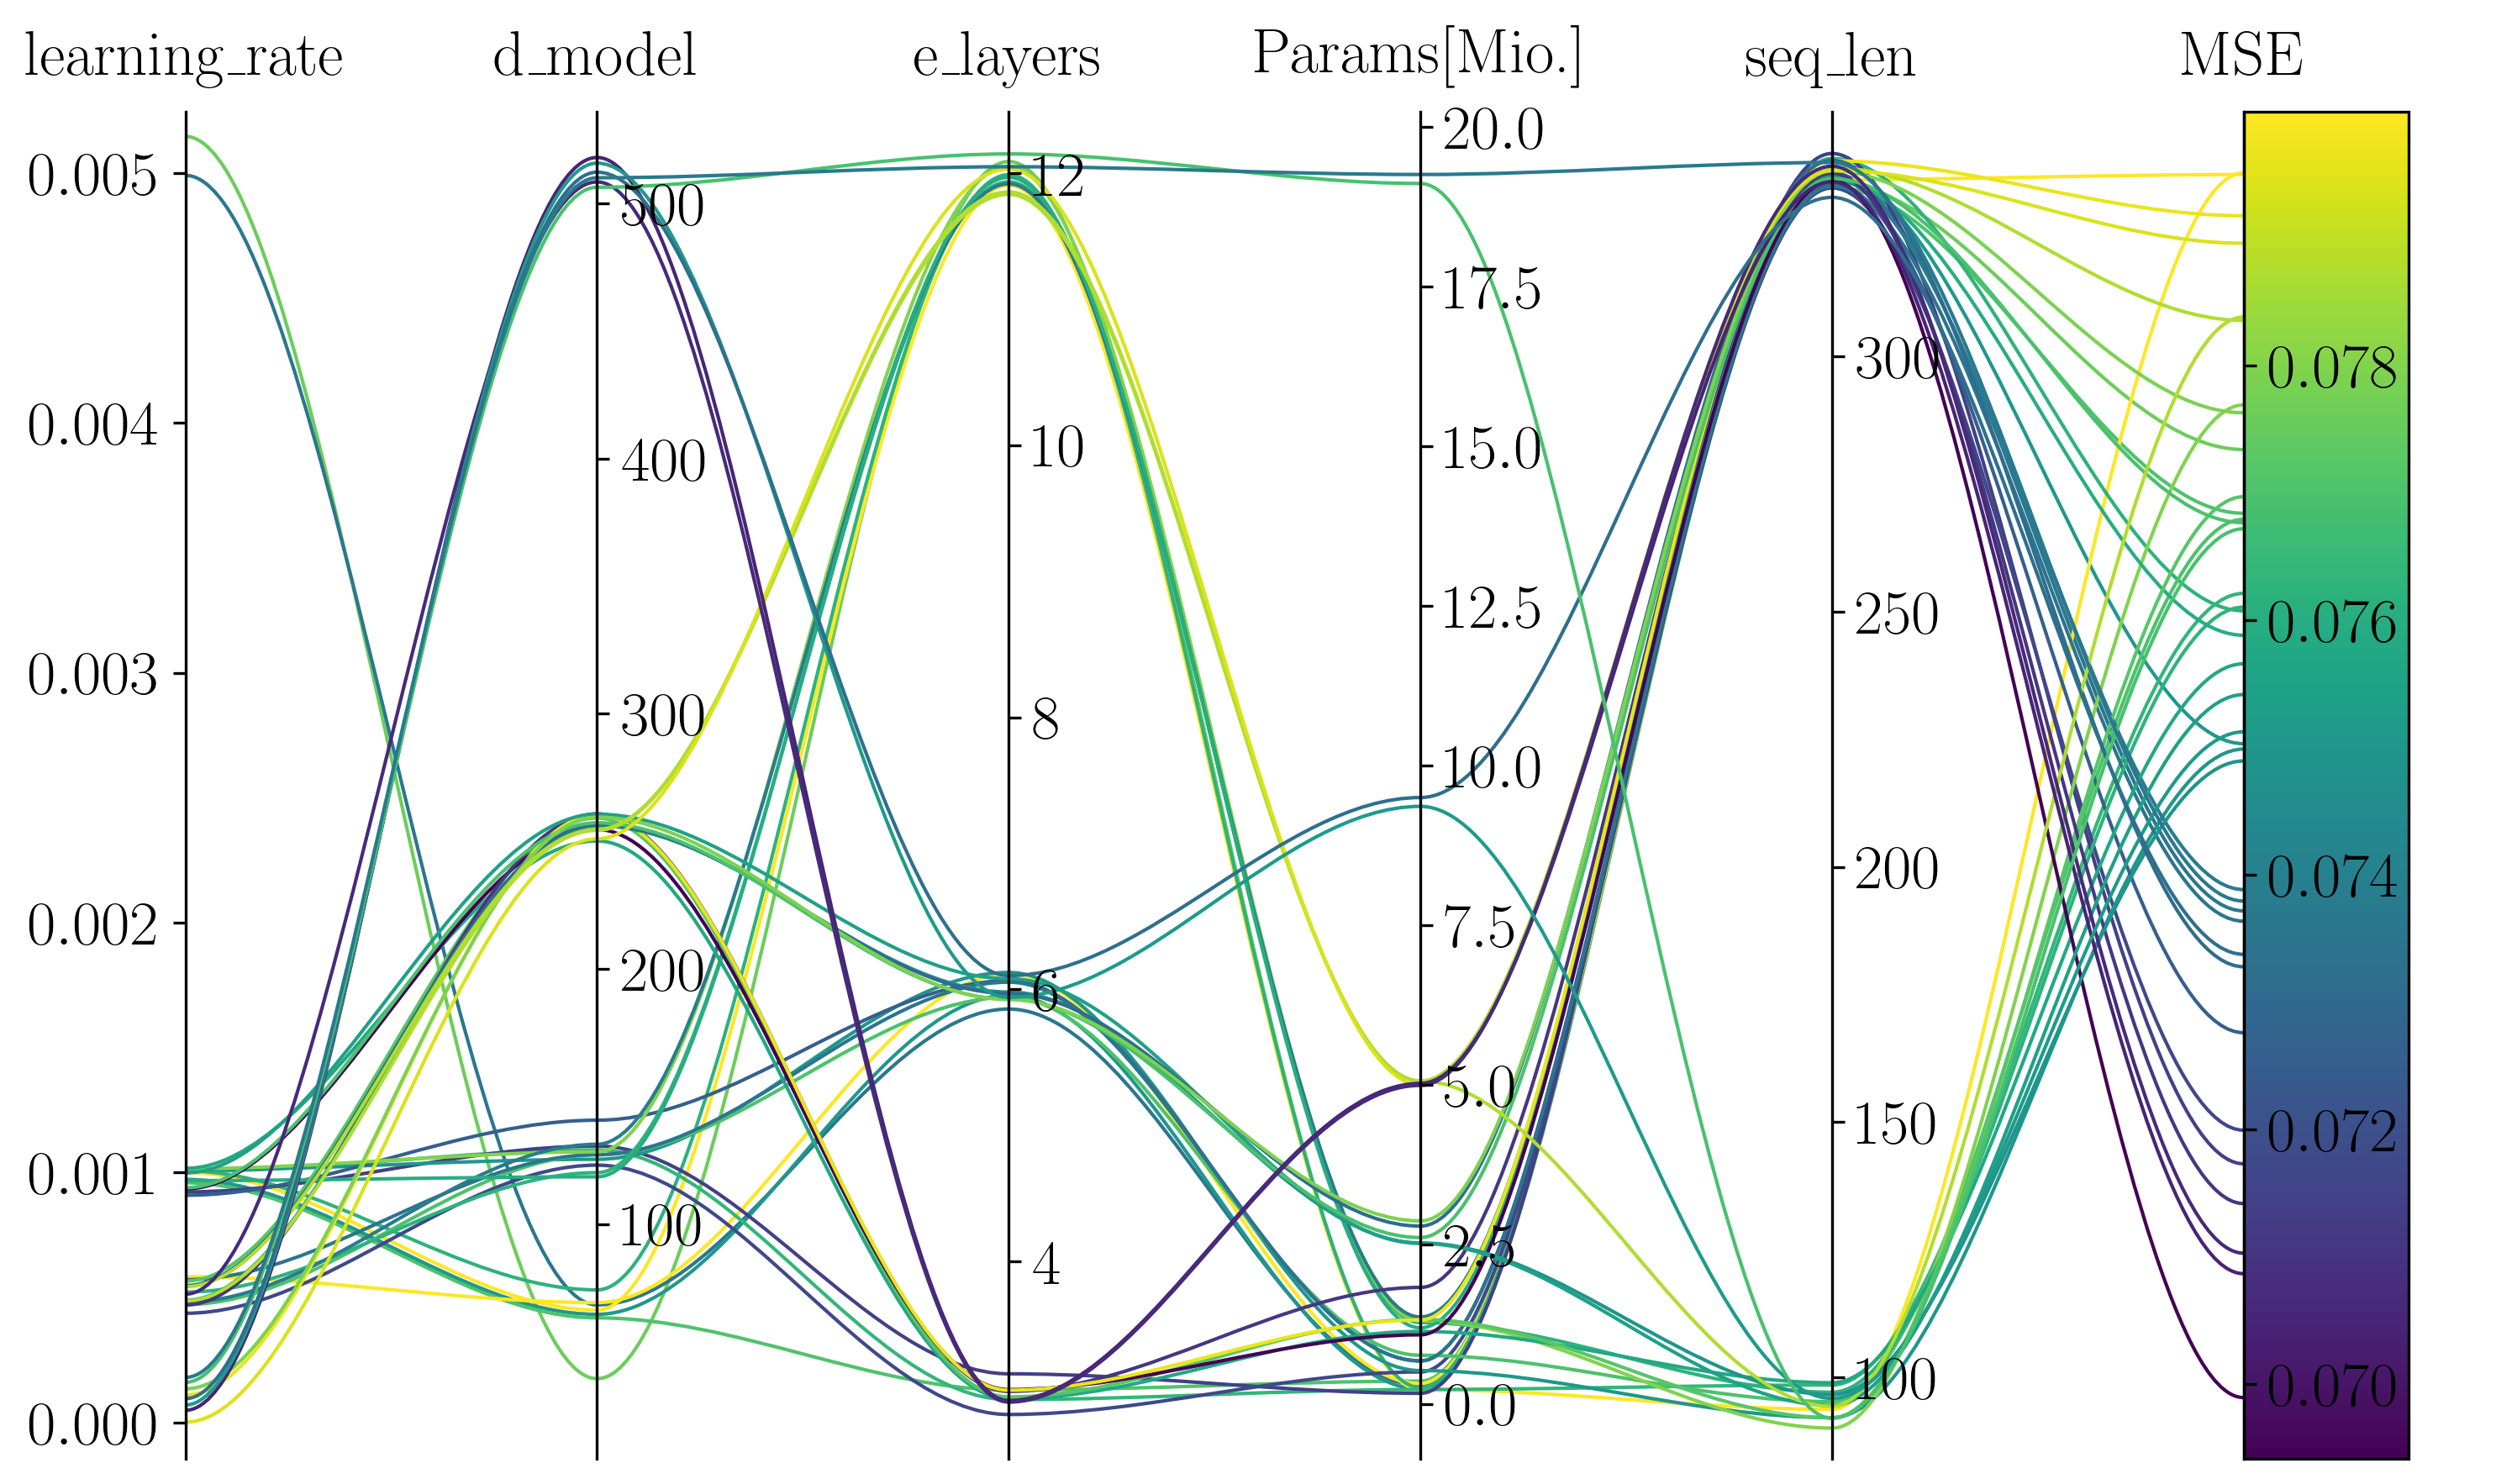

[0.00539, 492.79999999999995, 9.899999999999999, 20.999000000000002, 264.0, 0.005605341494083413]


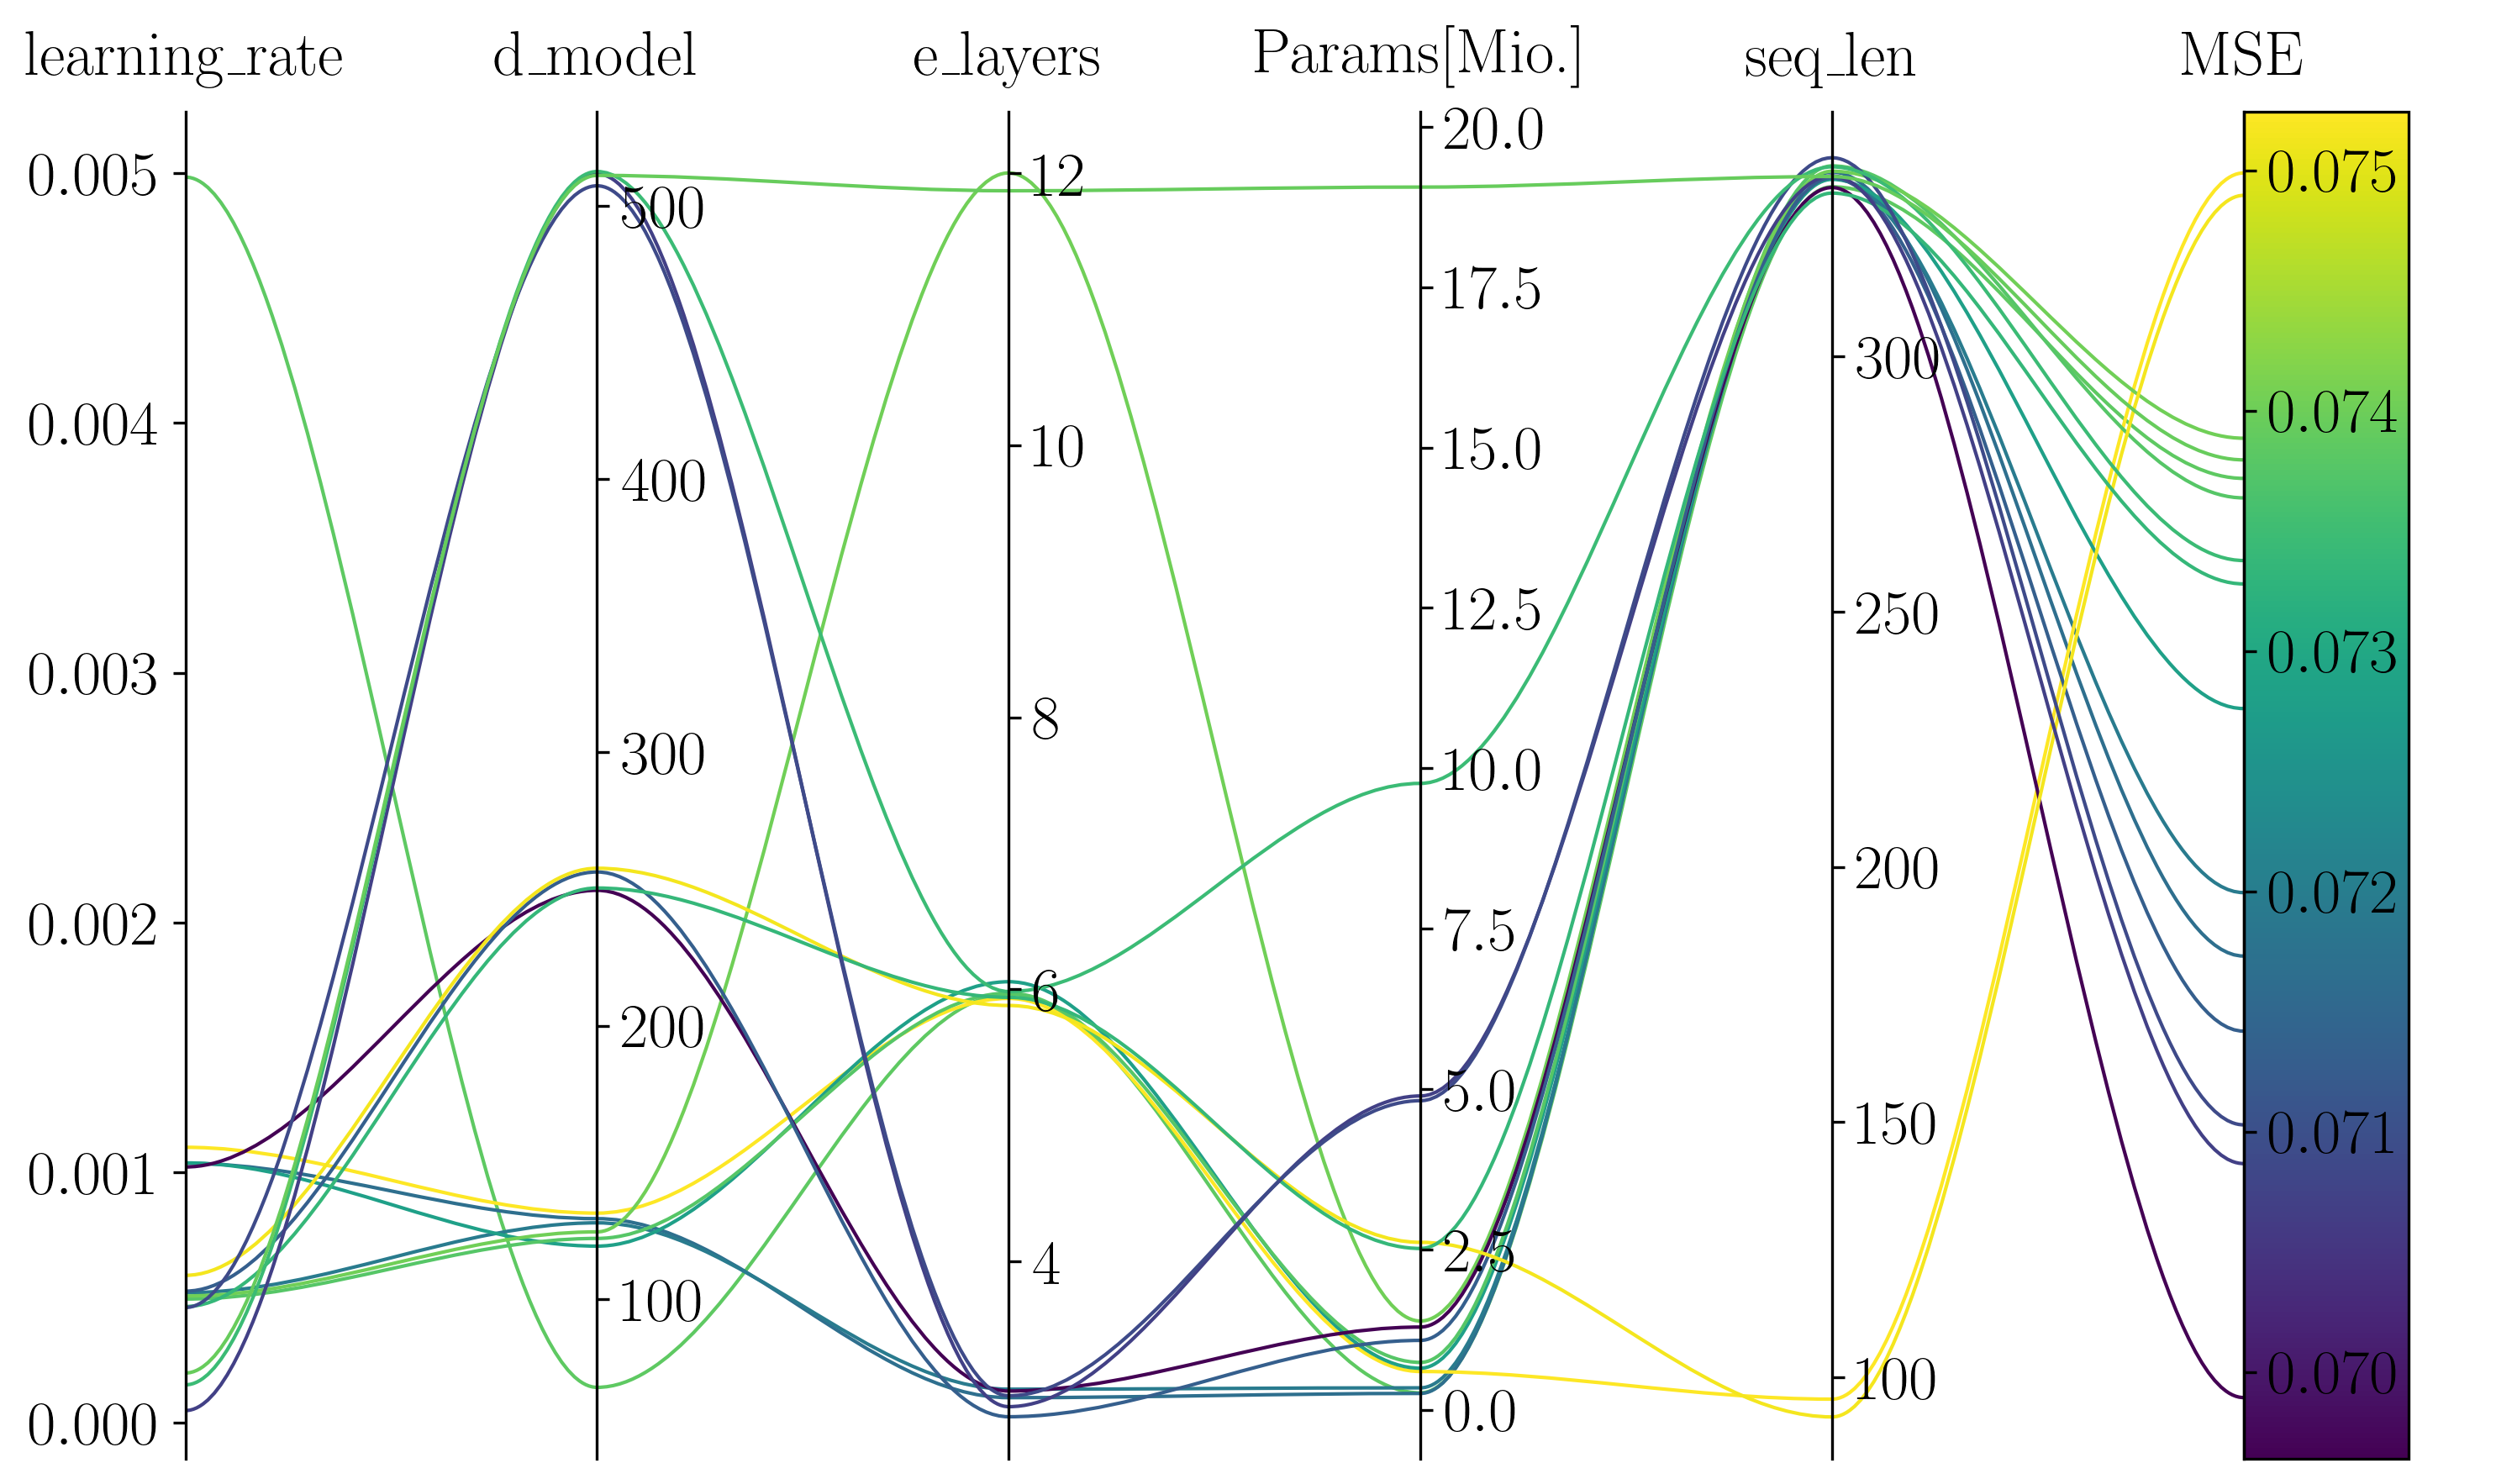

In [19]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.075)

ValueError: zero-size array to reduction operation minimum which has no identity

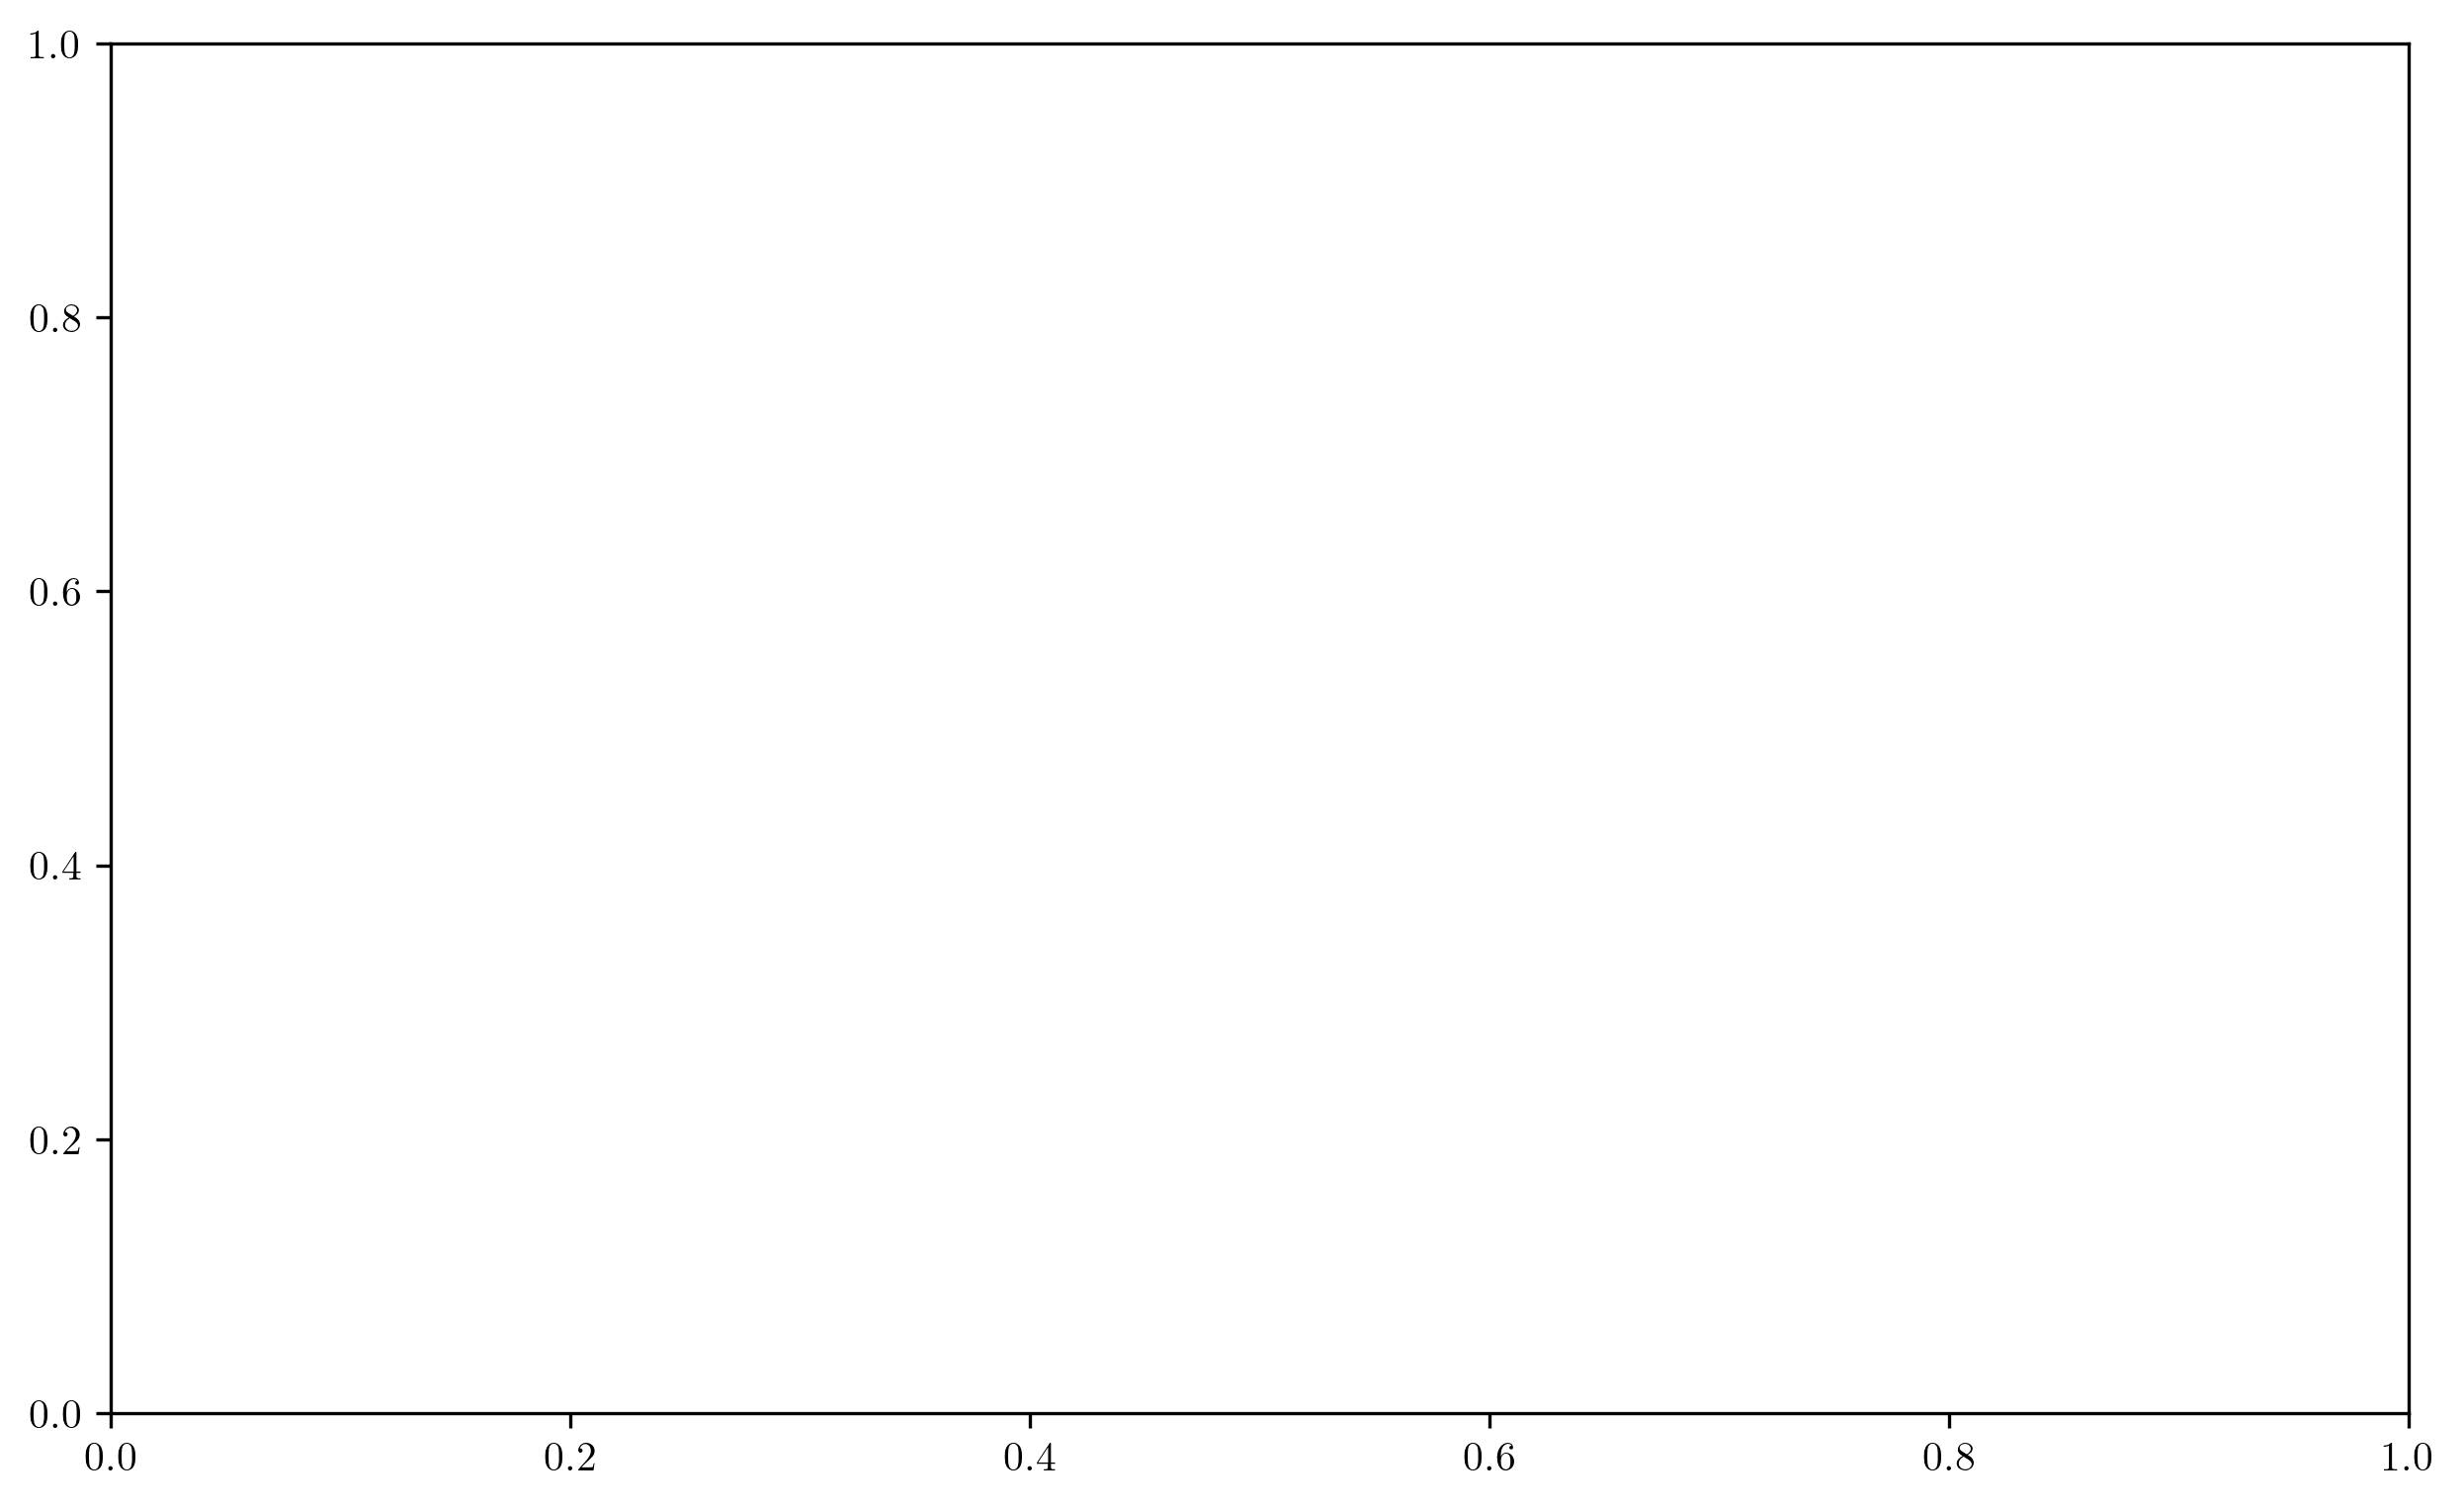

In [17]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


ValueError: zero-size array to reduction operation minimum which has no identity

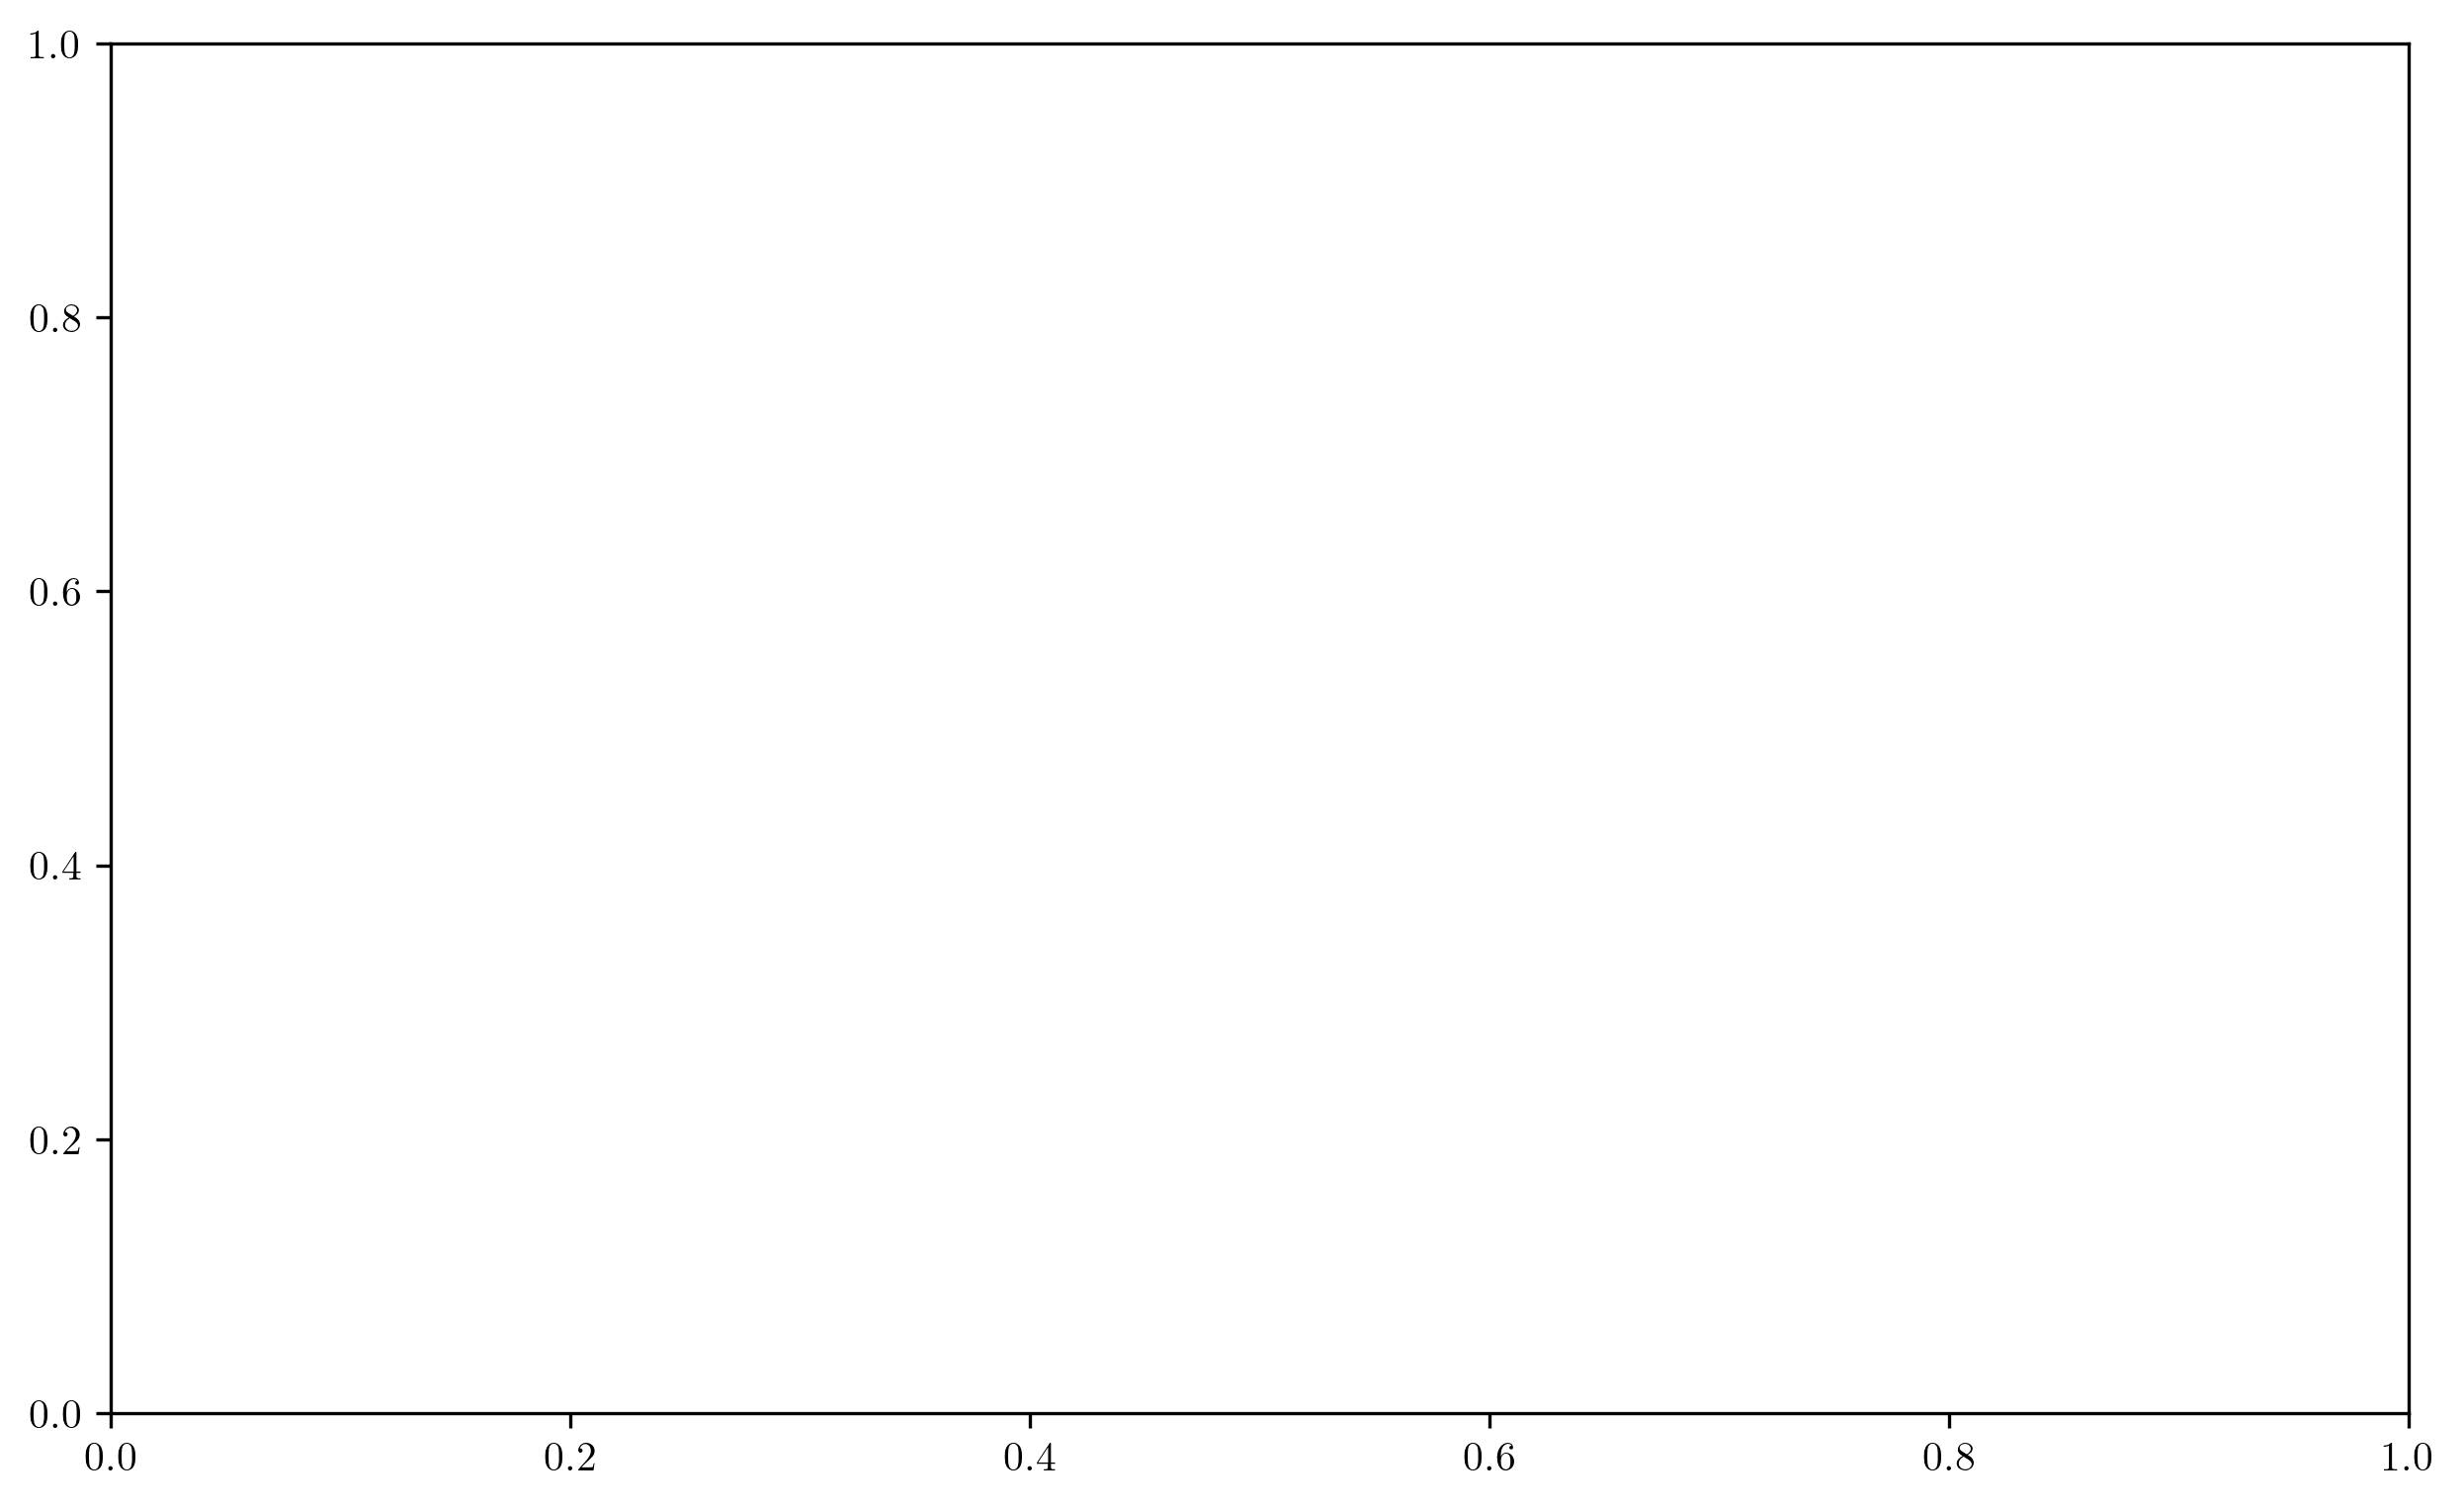

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

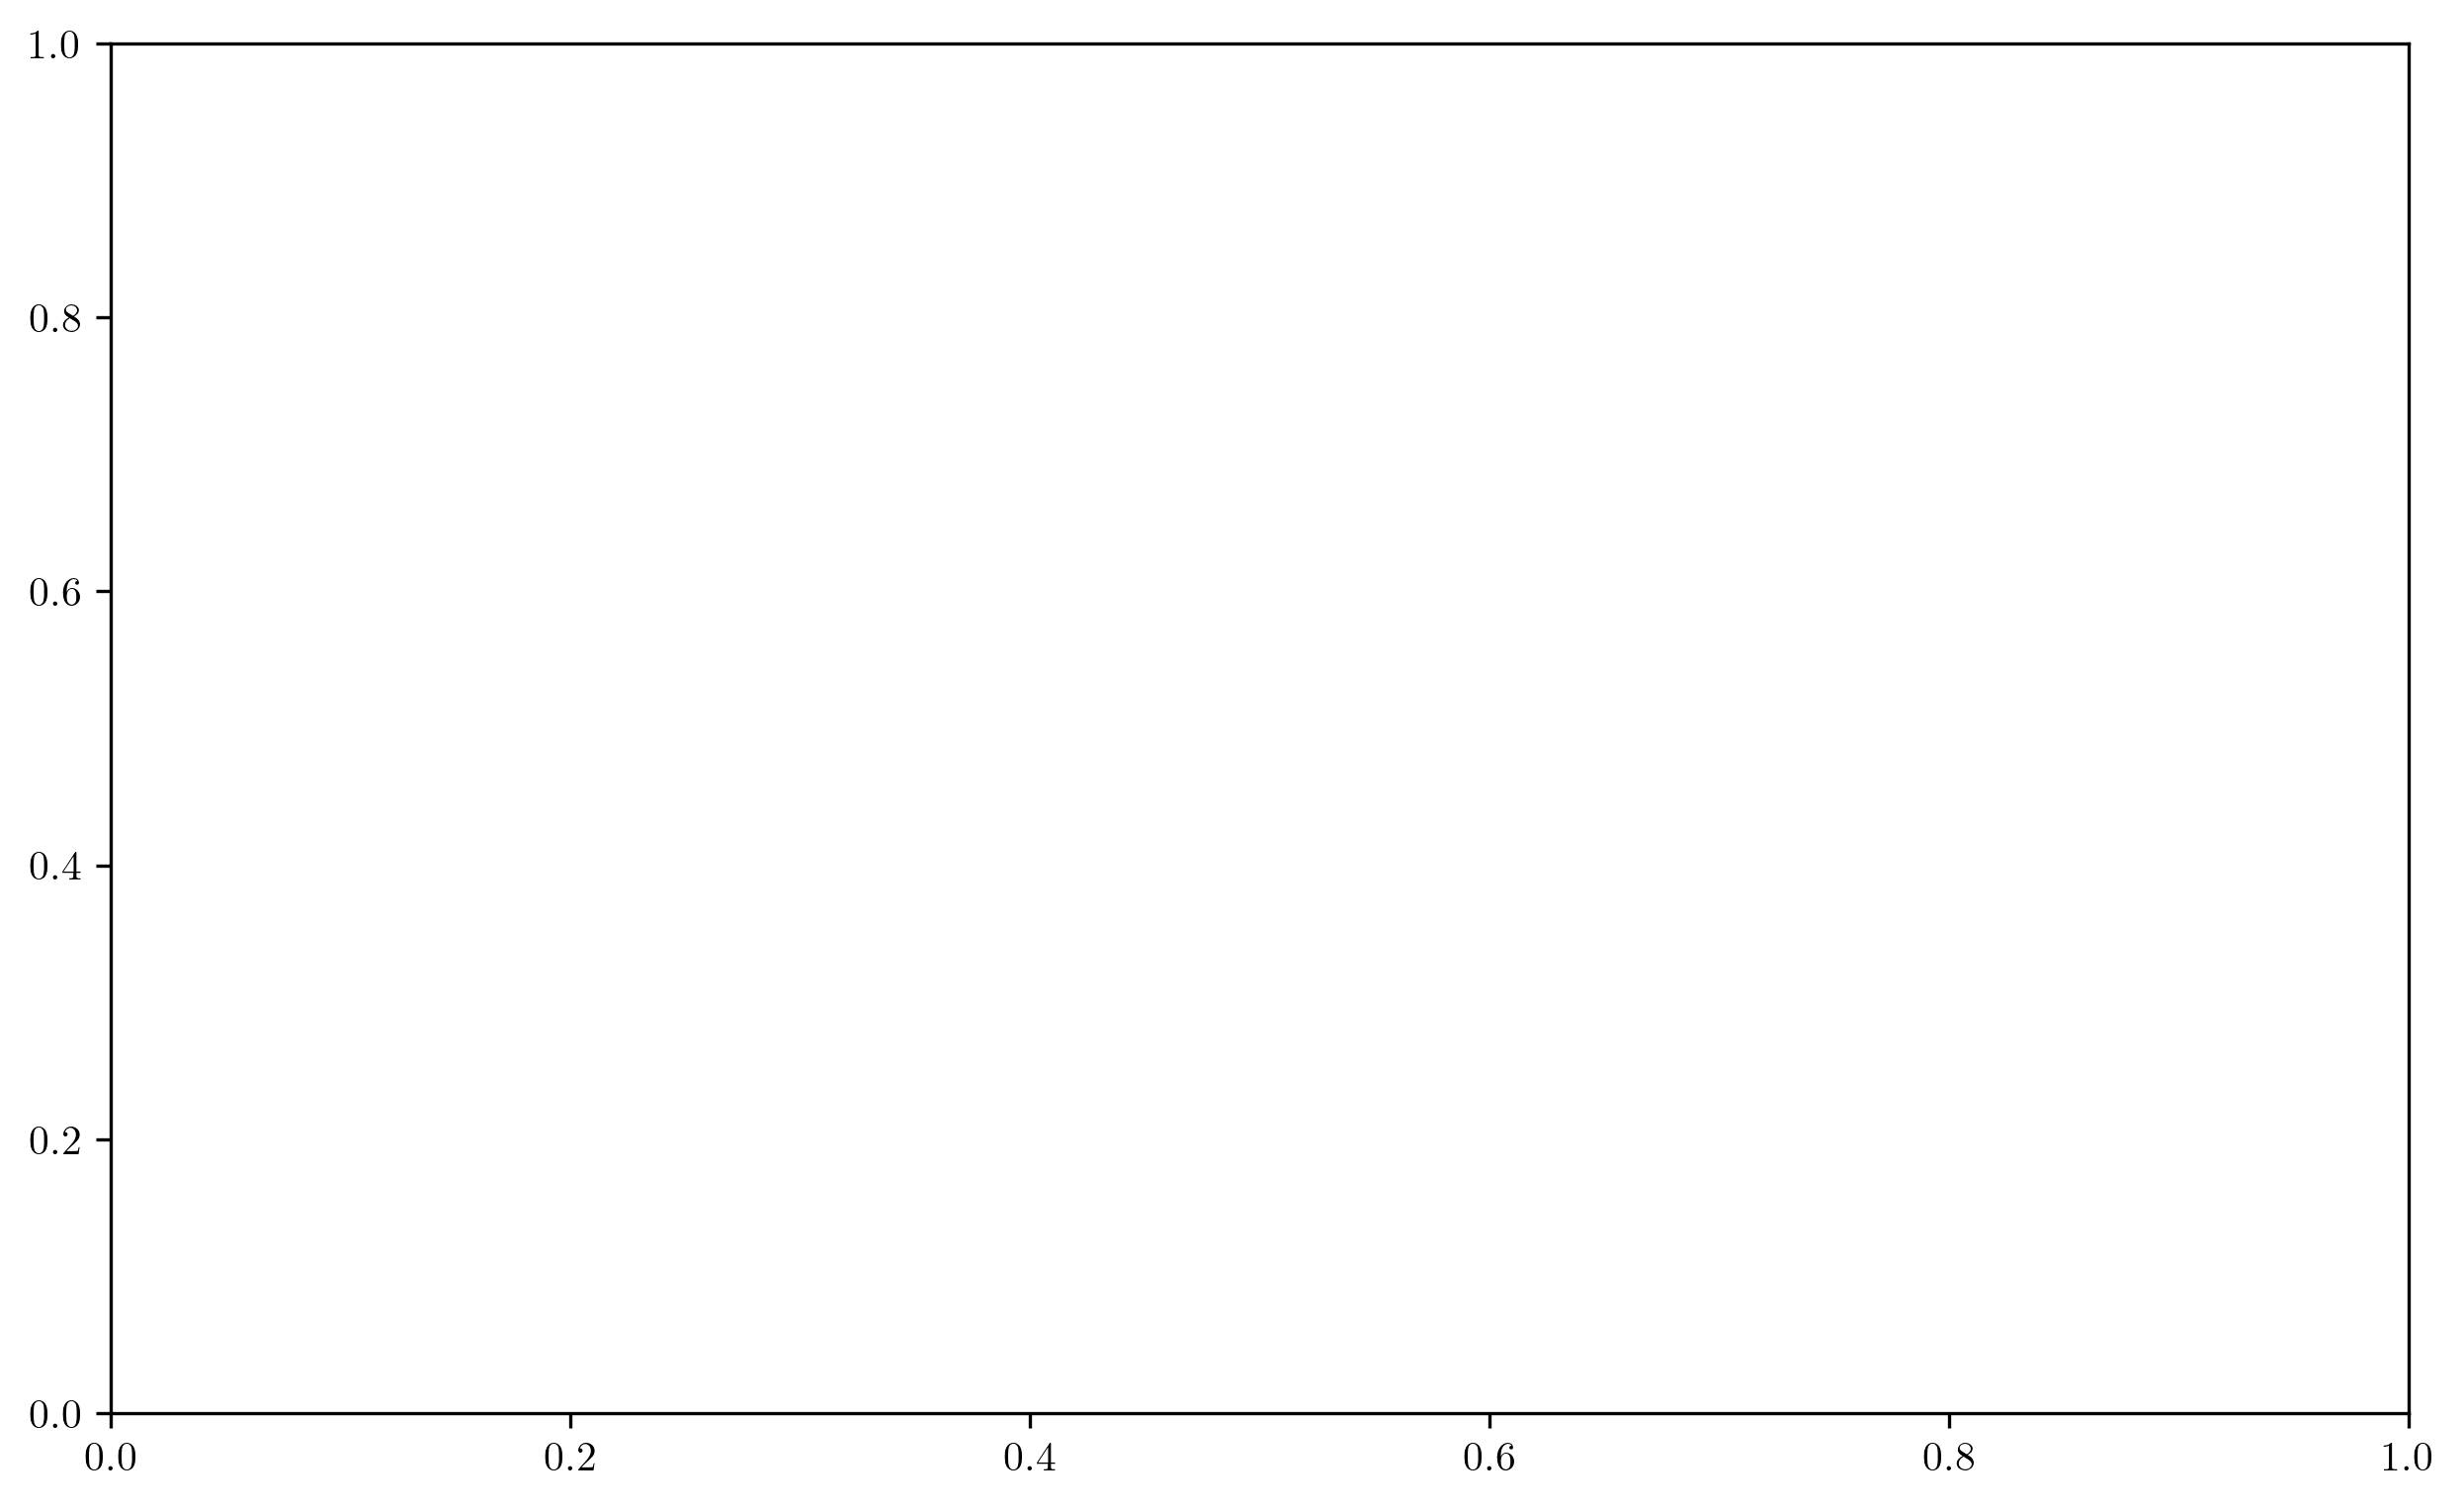

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


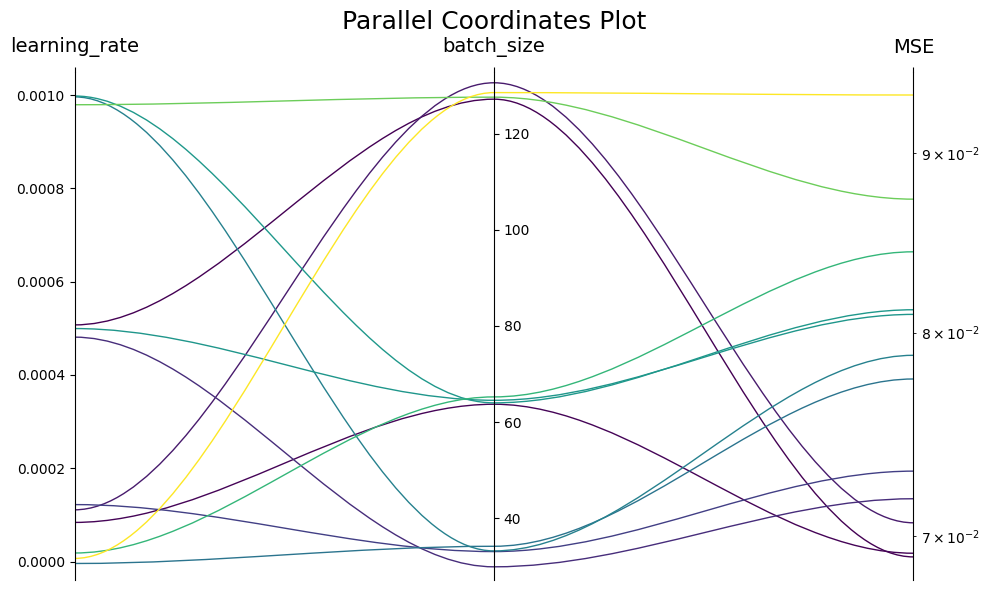

(7, 3)


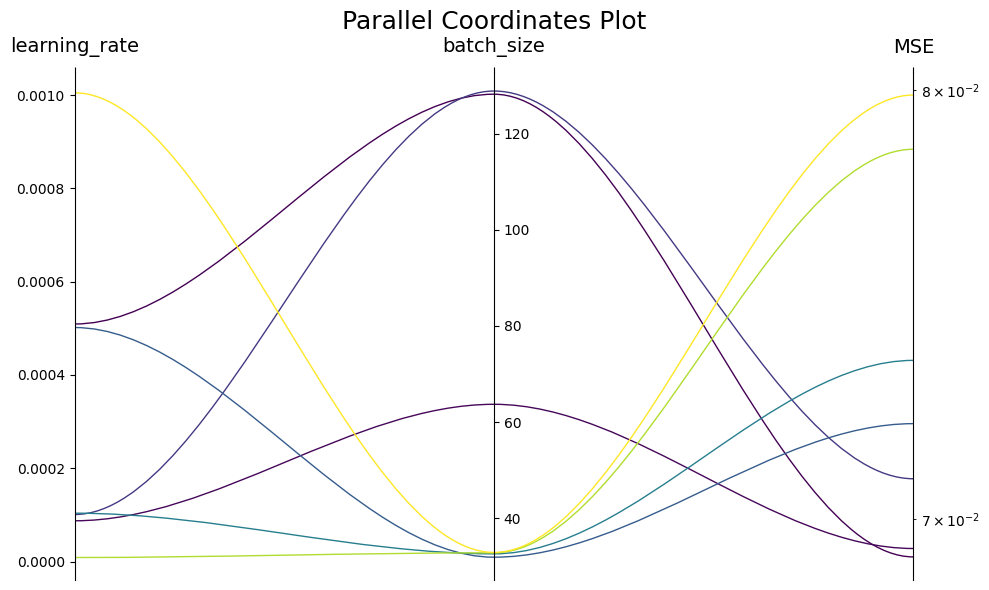

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)